# <span style ="color:  #708090">Case Study 3: Is Unfettered Capitalism Eating Itself?</span>

Author: Matt Johnson

Date: 2023-07-23

Email: matt.johnson0304@gmail.com

GitHub: https://github.com/MjxSjx

LinkedIn: https://www.linkedin.com/in/matt-johnson0304/

## <span style="color:#708090"> Introduction: </span>

Welcome to my case study. This is a personal project that I am excited to explore. I will be using open-source data to investigate and forming plots to display that data.


On a personal note, <em> I believe in capitalism; it brings competition and the best ideas to light in any industry. Think of cars, smart phones, or AI in any of its enumerable forms. All of which are available to anyone at a reasonable price. Captialism dictates that the goal is to offer a product to as many consumers as possible. A goal that has increased our economy and improved all of our lives. </em>

## <span style="color:#708090"> Ask - Step 1: Ask the right questions </span>

### <span style="color:#708090"> Deliverables: </span>

My task in the assignment is:

* To find out if unfettered capitalism is indeed eating itself in the United States. I will sift through some historical data on population, crude birth rates, immigration (gross births), worker wages, and CEO pay and see if there is any correlation in any of it


### <span style="color:#4169E1"> Problem: </span>

 <span style="color:#4169E1"><strong>Unfettered capitalism: Profits at all cost. Anything to squeeze the next dollar. A race to the bottom. </strong> </span>

Capitalists need workers, but they also need consumers to buy their products. Yet the population in the United States is plateauing while birth rates are declining and migration is slowing. Without new workers and without new consumers, companies will face harder times, and the system as a whole will slow down.

None of that even touches on the bubble we have coming for future generations. In the next 35 years, there will be more people over 65 than able-bodied workers in the United States. A big problem indeed.

## <span style="color:#708090"> Prepare - Step 2: Upload, inspect and clean the data </span>

### <span style="color:#708090"> Uploading </span>

In total, I will be using 5 different datasets and will leave the sources in the <strong>"Inspecting"</strong> section just below this one. 



In [2]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from matplotlib.ticker import FuncFormatter
from pandas import Timestamp
warnings.filterwarnings('ignore')


# Load data
cleaned_prod_wage = pd.read_excel('Y:/cleaned prod and wage.xlsx')
us_br_im_pop = pd.read_excel('Y:/us - br im pop.xlsx')
ceo_worker_pay = pd.read_excel('Y:CEO to worker pay 2015.xlsx')
ceo_worker_pay_2021 = pd.read_excel('Y:CEO to worker pay 2021.xlsx')
earnings_data = pd.read_excel("Y:top and bottom earnings 1979-2018.xlsx")

### <span style="color:#708090"> Inspecting </span>

The first thing we must do is understand the data. If we know what each sheet contains and what each column represents, we can start forming a plan of action. Our initial goal is to find connections between the sheets; think of keys as in primary keys and foreign keys. This can take time, but it is worth it. Once you have grasped what information the data is presenting, only then can you start to address your stakeholder questions.

This data goes by:

* CEO to worker pay for 2015: Highlighting the Top Companies of 2015 Based on CEO Compensation [Source](https://www.payscale.com/data-packages/ceo-pay/full-list)



* CEO to worker pay 2021: Highlighting the Top Companies of 2021 Based on Popularity [Source](https://www.business.org/finance/accounting/hourly-wages-ceo-vs-employees/)



* cleaned prod and wage: Highlighting Different Types of Workers and Productivity from 1947 to 2022 [Source](https://www.bls.gov/productivity/graphics/2022/graphic-4.htm)



* top and bottom earnings 1979-2018: Highlighting a macro view of earners based on which percentile they fall into from 1979–2018 [Source](https://www.epi.org/publication/swa-wages-2019/)



* us - br im popHighlighting The United States birth rates, migration, and population from 1950–2021 [Source](https://population.un.org/wpp/Download/Standard/MostUsed/)

### <span style="color:#708090"> Cleaning </span>

* There wasn't anything to clean. Much of the preparation involved simply removing unnecessary columns. I address them per plot

## <span style="color:#708090"> Process - Step 3: Perform data analysis procedures </span>


* Since our goal is to essentially give broad strokes of data using the year as our focal point


## <span style="color:#708090"> Analyze and Share: Steps 4–5: Analyzing and plotting time </span>

### <span style="color:#708090"> Labor Productivity (All workers, Nonfarm business sector) Realtive to 1947 </span>

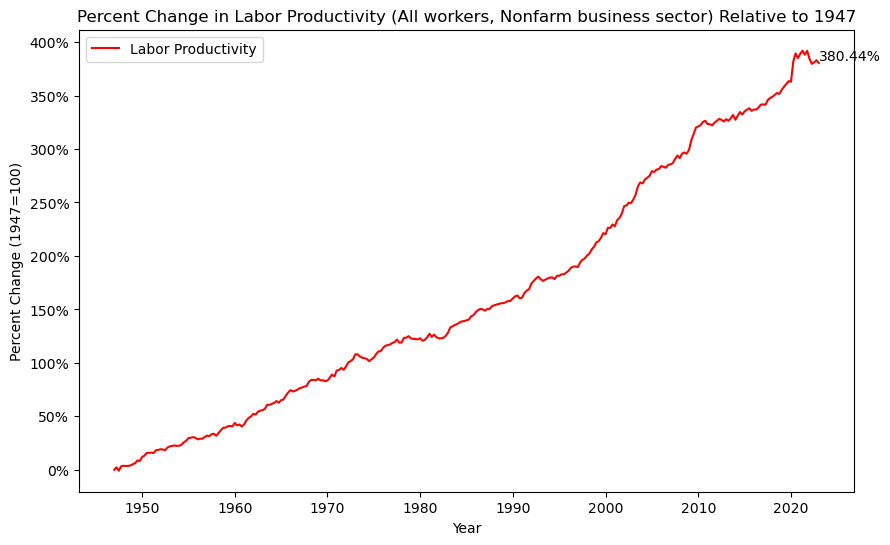

In [2]:
# Filter data
filtered_index = cleaned_prod_wage[(cleaned_prod_wage['Measure'] == 'Labor productivity') &
                                   (cleaned_prod_wage['Units'] == 'Index (2012=100)')]

# Reshape dataframe
melted_filtered_index = filtered_index.melt(id_vars=filtered_index.columns[:4], 
                                            var_name='Date', 
                                            value_name='Value')

# Format Date and Value
melted_filtered_index['Date'] = pd.to_datetime(melted_filtered_index['Date'].str.replace(' Q', 'Q'))
melted_filtered_index = melted_filtered_index[melted_filtered_index['Value'] != 'N.A.']
melted_filtered_index['Value'] = melted_filtered_index['Value'].astype(float)

# Filter that data
filtered_sector = melted_filtered_index[(melted_filtered_index['Basis'] == 'All workers') &
                                        (melted_filtered_index['Sector'] == 'Nonfarm business sector')]

# Calc % change
filtered_sector['Percent Change (1947=100)'] = (filtered_sector['Value'] / filtered_sector.loc[filtered_sector['Date'] == '1947-01-01', 'Value'].values[0] - 1) * 100

# Pivot data
pivot_data = filtered_sector.pivot(index='Date', columns='Measure', values='Percent Change (1947=100)')

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['Labor productivity'], label='Labor Productivity', color='red')

# Annotate last point
plt.text(pivot_data.index[-1], pivot_data['Labor productivity'].iloc[-1], f'{pivot_data["Labor productivity"].iloc[-1]:.2f}%', va='bottom')

# Add "%" to y-axis label
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.title('Percent Change in Labor Productivity (All workers, Nonfarm business sector) Relative to 1947')
plt.xlabel('Year')
plt.ylabel('Percent Change (1947=100)')
plt.legend()

plt.show()

* Innovation and technology have played an instrumental role in this fantastic growth rate. Year after year, capitalism continues to increase worker efficiency, truly insipring

### <span style="color:#708090"> Real Hourly Compensation Realtive to 1947 </span>

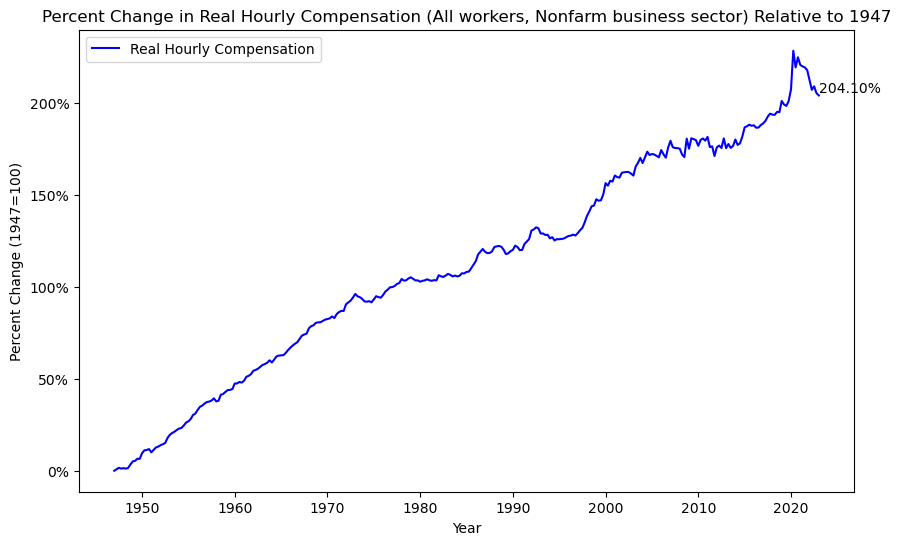

In [3]:
# Filter data
filtered_index = cleaned_prod_wage[(cleaned_prod_wage['Measure'] == 'Real hourly compensation') &
                                   (cleaned_prod_wage['Units'] == 'Index (2012=100)')]

# Reshape dataframe
melted_filtered_index = filtered_index.melt(id_vars=filtered_index.columns[:4], 
                                            var_name='Date', 
                                            value_name='Value')

# Format Date and Value
melted_filtered_index['Date'] = pd.to_datetime(melted_filtered_index['Date'].str.replace(' Q', 'Q'))
melted_filtered_index = melted_filtered_index[melted_filtered_index['Value'] != 'N.A.']
melted_filtered_index['Value'] = melted_filtered_index['Value'].astype(float)

# Filter that data
filtered_sector = melted_filtered_index[(melted_filtered_index['Basis'] == 'All workers') &
                                        (melted_filtered_index['Sector'] == 'Nonfarm business sector')]

# Calc index
filtered_sector['Index (1947=100)'] = filtered_sector['Value'] / filtered_sector.loc[filtered_sector['Date'] == '1947-01-01', 'Value'].values[0] * 100

# Calc % change
filtered_sector['Percent Change (1947=100)'] = (filtered_sector['Index (1947=100)'] / filtered_sector.loc[filtered_sector['Date'] == '1947-01-01', 'Index (1947=100)'].values[0] - 1) * 100

# Pivot data
pivot_data = filtered_sector.pivot(index='Date', columns='Measure', values='Percent Change (1947=100)')

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['Real hourly compensation'], label='Real Hourly Compensation', color='blue')

# Annotate last point
plt.text(pivot_data.index[-1], pivot_data['Real hourly compensation'].iloc[-1], f'{pivot_data["Real hourly compensation"].iloc[-1]:.2f}%', va='bottom')

# Add "%" to y-axis label
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.title('Percent Change in Real Hourly Compensation (All workers, Nonfarm business sector) Relative to 1947')
plt.xlabel('Year')
plt.ylabel('Percent Change (1947=100)')
plt.legend()

plt.show()

* Workers wages look healthy in this plot. A solid, consistent upward trajectory

### <span style="color:#708090"> Real Hourly Comp & Labor Productivity Realtive to 1947 </span>

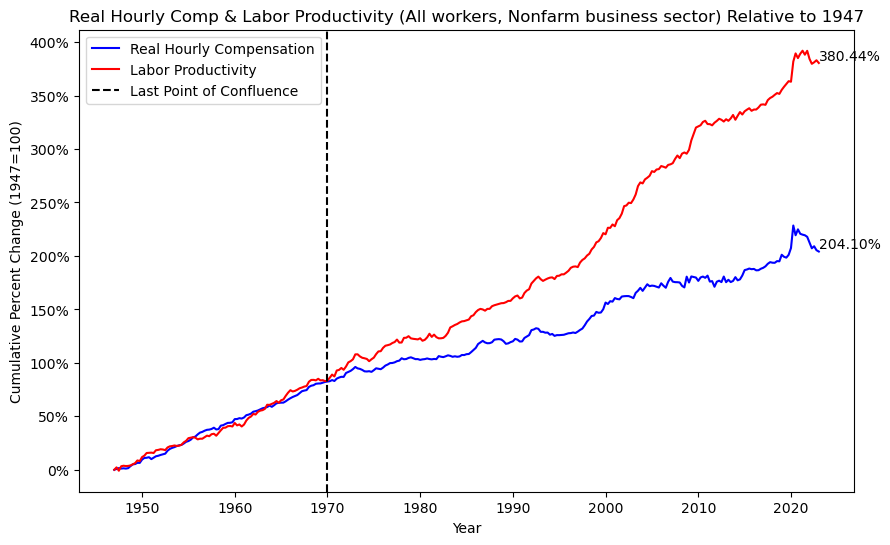

In [4]:
# Filter data
filtered_index = cleaned_prod_wage[((cleaned_prod_wage['Measure'] == 'Real hourly compensation') | 
                                    (cleaned_prod_wage['Measure'] == 'Labor productivity')) &
                                   (cleaned_prod_wage['Units'] == 'Index (2012=100)')]

# Reshape dataframe
melted_filtered_index = filtered_index.melt(id_vars=filtered_index.columns[:4], 
                                            var_name='Date', 
                                            value_name='Value')

# Format Date and Value
melted_filtered_index['Date'] = pd.to_datetime(melted_filtered_index['Date'].str.replace(' Q', 'Q'))
melted_filtered_index = melted_filtered_index[melted_filtered_index['Value'] != 'N.A.']
melted_filtered_index['Value'] = melted_filtered_index['Value'].astype(float)

# Filter that data
filtered_sector = melted_filtered_index[(melted_filtered_index['Basis'] == 'All workers') &
                                        (melted_filtered_index['Sector'] == 'Nonfarm business sector')]

# Calc index
filtered_sector['Index (1947=100)'] = filtered_sector.groupby('Measure')['Value'].transform(lambda x: x / x[x.index[0]] * 100)
filtered_sector['Cumulative Percent Change (1947=100)'] = filtered_sector.groupby('Measure')['Index (1947=100)'].transform(lambda x: (x / x[x.index[0]] - 1) * 100)

# Pivot data
pivot_data = filtered_sector.pivot(index='Date', columns='Measure', values='Cumulative Percent Change (1947=100)')

# Calc growth
total_growth = filtered_sector.groupby('Measure')['Index (1947=100)'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['Real hourly compensation'], label='Real Hourly Compensation', color='blue')
plt.plot(pivot_data.index, pivot_data['Labor productivity'], label='Labor Productivity', color='red')

# Add vertical dashed
plt.axvline(x=pd.to_datetime('1970-01-01'), color='black', linestyle='--', label='Last Point of Confluence')

# Add total % growth
plt.text(pivot_data.index[-1], pivot_data['Real hourly compensation'].iloc[-1], f'{total_growth["Real hourly compensation"]:.2f}%', va='bottom')
plt.text(pivot_data.index[-1], pivot_data['Labor productivity'].iloc[-1], f'{total_growth["Labor productivity"]:.2f}%', va='bottom')


# Set y-axis tick label to include % sign
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))


plt.title('Real Hourly Comp & Labor Productivity (All workers, Nonfarm business sector) Relative to 1947')
plt.xlabel('Year')
plt.ylabel('Cumulative Percent Change (1947=100)')
plt.legend()

plt.show()

* At this point, we notice the last point of confluence, which was 1970. Most of you reading this weren't born yet or were just children. Productivity starts to deviate from workers earnings more significantly each year moving forward

## <span style="color:#4169E1"> The question remains: </span>

### <span style="color:#4169E1"><strong><em>Where did all the extra productivity gains go?</em></strong></span>

* More on that in a little bit. First, we need to check on U.S. birth rates and population

### <span style="color:#708090"> Crude Birth Rates </span>

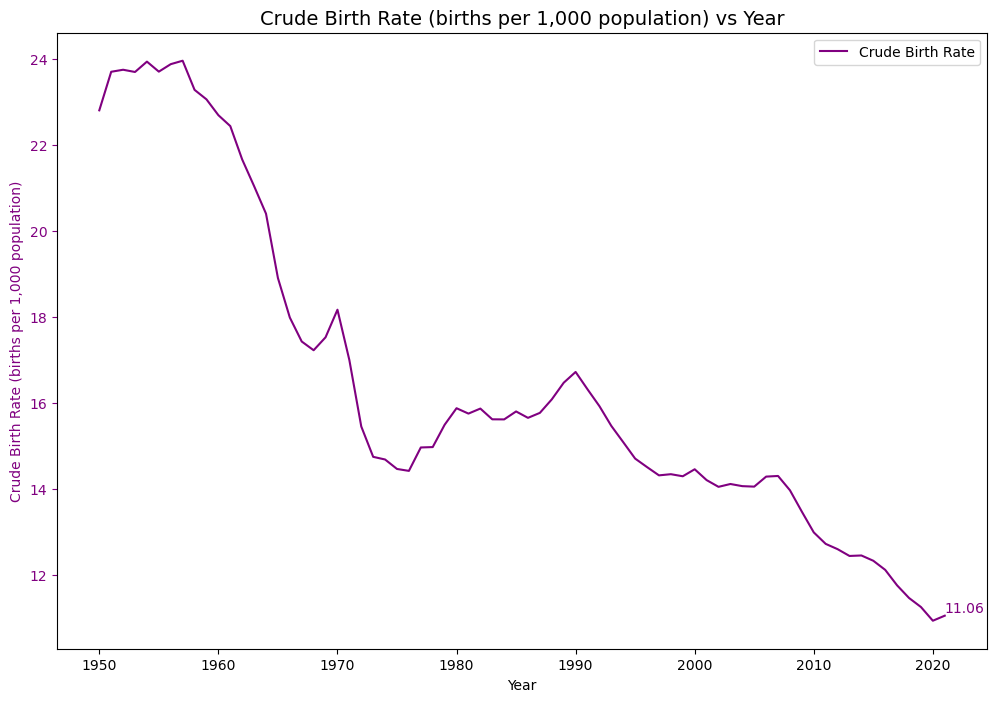

In [5]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Crude Birth Rate
ax.plot(us_br_im_pop['Year'], us_br_im_pop['Crude Birth Rate (births per 1,000 population)'], color='purple', label='Crude Birth Rate')

# Add text label for last point
last_year = us_br_im_pop['Year'].values[-1]
last_crude_birth_rate = us_br_im_pop['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax.text(last_year, last_crude_birth_rate, f'{last_crude_birth_rate:.2f}', va='bottom', color='purple')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Crude Birth Rate (births per 1,000 population)', color='purple')
plt.title('Crude Birth Rate (births per 1,000 population) vs Year', fontsize=14)

# Change y-axis label color, yes i did it the slow way. I wanted to do it differently for fun, I was showing my wife how to do it. I had her do one too. :)
ax.tick_params(axis='y', colors='purple')

# Show legend and plot
ax.legend()
plt.show()

* Crude in this context is akin to "gross," meaning the total births with nothing subtracted

* What I can't show you are the U.N. projections of the United States birth rate. However, the focal point of this website is that women are and will be having fewer than two children on average, which in turn reduces the population [U.S. Birth Rate Projections](https://www.macrotrends.net/countries/USA/united-states/fertility-rate)

### <span style="color:#708090"> U.S. Population </span>

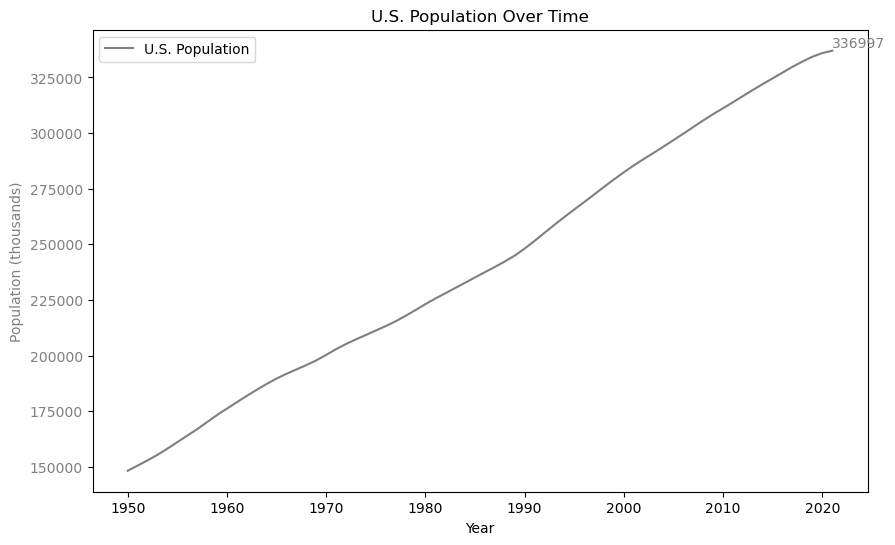

In [6]:
# Convert Year
us_br_im_pop['Year'] = pd.to_datetime(us_br_im_pop['Year'], format="%Y")

# Create figure and set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population
color = 'tab:gray'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)', color=color)
ax1.plot(us_br_im_pop['Year'], us_br_im_pop['Total Population (thousands)'], color=color, label='U.S. Population')
ax1.tick_params(axis='y', labelcolor=color)

# Add text label for last point
last_year = us_br_im_pop['Year'].values[-1]
last_population = us_br_im_pop['Total Population (thousands)'].values[-1]
plt.text(last_year, last_population, f'{int(last_population)}', va='bottom', color=color)

plt.title('U.S. Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')
plt.legend()

plt.show()


* Again, what I can't show you are the projections of the US population past the current date; essentially, we're plateauing. Here's a website using U.N. Projections showing just that [U.S. Population Projections](https://www.macrotrends.net/countries/USA/united-states/population)

### <span style="color:#708090"> U.S. Population and Crude Birth Rate Over Time </span>

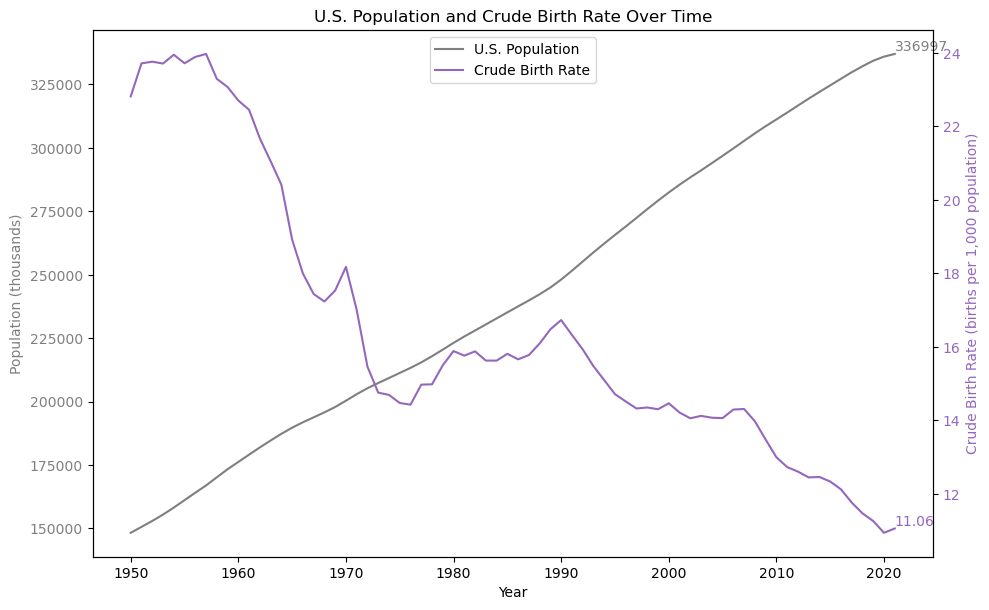

In [7]:
# Convert Year
us_br_im_pop['Year'] = pd.to_datetime(us_br_im_pop['Year'], format="%Y")

# Create figure and set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population
pop_color = 'tab:gray'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)', color=pop_color)
ax1.plot(us_br_im_pop['Year'], us_br_im_pop['Total Population (thousands)'], color=pop_color, label='U.S. Population')
ax1.tick_params(axis='y', labelcolor=pop_color)

# Add text label for last point
last_year = us_br_im_pop['Year'].values[-1]
last_population = us_br_im_pop['Total Population (thousands)'].values[-1]
ax1.text(last_year, last_population, f'{int(last_population)}', va='bottom', color=pop_color)

# Using twinx for second y-axis
birth_rate_color = 'tab:purple'
ax2 = ax1.twinx()
ax2.set_ylabel('Crude Birth Rate (births per 1,000 population)', color=birth_rate_color)
ax2.plot(us_br_im_pop['Year'], us_br_im_pop['Crude Birth Rate (births per 1,000 population)'], color=birth_rate_color, label='Crude Birth Rate')
ax2.tick_params(axis='y', labelcolor=birth_rate_color)

# Add text label for last point
last_birth_rate = us_br_im_pop['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax2.text(last_year, last_birth_rate, f'{last_birth_rate:.2f}', va='bottom', color=birth_rate_color)

# Fix layout and display legend
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,1), bbox_transform=ax1.transAxes)

plt.title('U.S. Population and Crude Birth Rate Over Time')
plt.show()

* The two plots are combined into a dual axis

### <span style="color:#708090"> Real Hourly, Labor, and Birth Rate Comparison Relative to 1947 </span>

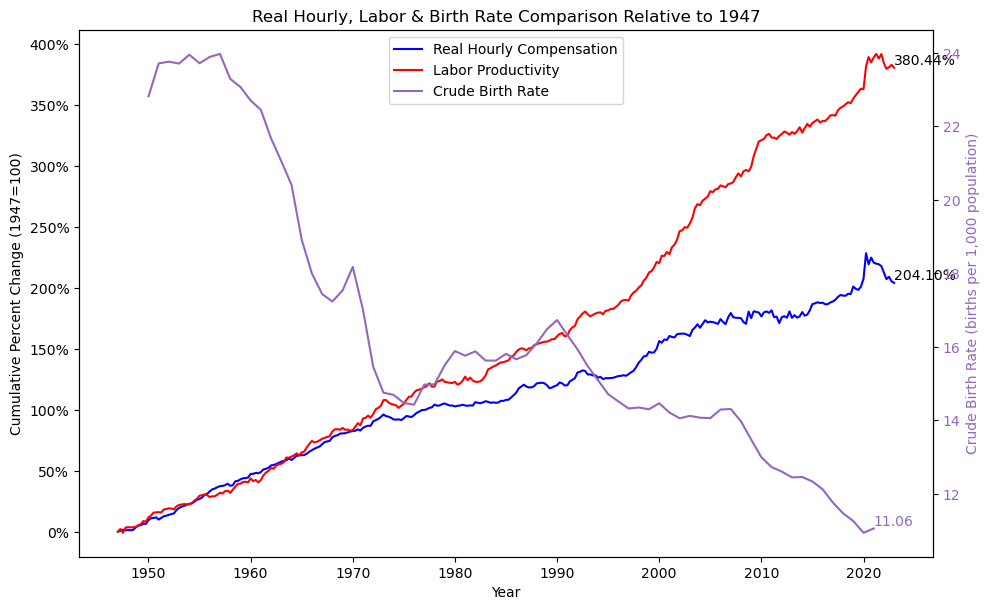

In [8]:
# Filter data
f_cei = cleaned_prod_wage[((cleaned_prod_wage['Measure'] == 'Real hourly compensation') | 
                            (cleaned_prod_wage['Measure'] == 'Labor productivity')) &
                           (cleaned_prod_wage['Units'] == 'Index (2012=100)')]

# Reshape dataframe 
m_f_cei = f_cei.melt(id_vars=f_cei.columns[:4], 
                      var_name='Date', 
                      value_name='Value')

# Convert Date
m_f_cei['Date'] = pd.to_datetime(m_f_cei['Date'].str.replace(' Q', 'Q'))

# Drop rows with N.A. and convert Value
m_f_cei = m_f_cei[m_f_cei['Value'] != 'N.A.']
m_f_cei['Value'] = m_f_cei['Value'].astype(float)

# Filter data 
fm_f_cei = m_f_cei[(m_f_cei['Basis'] == 'All workers') &
                   (m_f_cei['Sector'] == 'Nonfarm business sector')]

# Calc index 
fm_f_cei['Index (1947=100)'] = fm_f_cei.groupby('Measure')['Value'].transform(lambda x: x / x[x.index[0]] * 100)

# Calc cumulative % change
fm_f_cei['Cumulative Percent Change (1947=100)'] = fm_f_cei.groupby('Measure')['Index (1947=100)'].transform(lambda x: (x / x[x.index[0]] - 1) * 100)

# Pivot data
p_fm_f_cei = fm_f_cei.pivot(index='Date', columns='Measure', values='Cumulative Percent Change (1947=100)')

# Calc growth 
actual_total_growth_raw_index = fm_f_cei.groupby('Measure')['Index (1947=100)'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)

# Create figure and set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# time-series
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Percent Change (1947=100)', color='black')
ax1.plot(p_fm_f_cei.index, 
         p_fm_f_cei['Real hourly compensation'], 
         color='blue', 
         label='Real Hourly Compensation')

ax1.plot(p_fm_f_cei.index, 
         p_fm_f_cei['Labor productivity'], 
         color='red', 
         label='Labor Productivity')

ax1.tick_params(axis='y', labelcolor='black')

# Add total % of growth 
ax1.text(p_fm_f_cei.index[-1], 
         p_fm_f_cei['Real hourly compensation'].iloc[-1], 
         f'{actual_total_growth_raw_index["Real hourly compensation"]:.2f}%', 
         va='bottom', 
         color='black')

ax1.text(p_fm_f_cei.index[-1], 
         p_fm_f_cei['Labor productivity'].iloc[-1], 
         f'{actual_total_growth_raw_index["Labor productivity"]:.2f}%', 
         va='bottom', 
         color='black')

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))


# Using twinx for second y-axis
birth_rate_color = 'tab:purple'
ax2 = ax1.twinx()
ax2.set_ylabel('Crude Birth Rate (births per 1,000 population)', color=birth_rate_color)
ax2.plot(us_br_im_pop['Year'], us_br_im_pop['Crude Birth Rate (births per 1,000 population)'], color=birth_rate_color, label='Crude Birth Rate')
ax2.tick_params(axis='y', labelcolor=birth_rate_color)

# Add text label for last point
last_birth_rate = us_br_im_pop['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax2.text(last_year, last_birth_rate, f'{last_birth_rate:.2f}', va='bottom', color=birth_rate_color)

# Fix layout and display legend
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,1), bbox_transform=ax1.transAxes)

plt.title('Real Hourly, Labor & Birth Rate Comparison Relative to 1947')
plt.show()

* Here we start to gather an understanding of whether there is a correlation between wages and birth rates. The initial giant drop in birth rates in 1950 occurred after the baby boomer phase of America had passed and normalcy returned

* Into the 1990s, wage disparity to worker productivity started taking its toll

### <span style="color:#708090"> Post-1970 Real Hourly, Labor & Birth Rate Comparison </span>

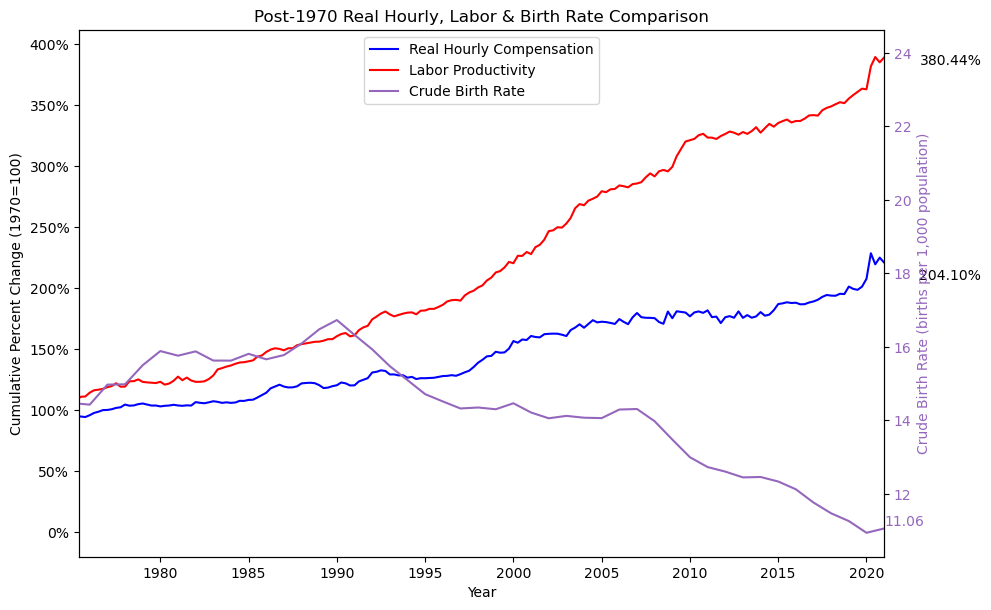

In [9]:
# Filter data
f_cei = cleaned_prod_wage[((cleaned_prod_wage['Measure'] == 'Real hourly compensation') | 
                            (cleaned_prod_wage['Measure'] == 'Labor productivity')) &
                           (cleaned_prod_wage['Units'] == 'Index (2012=100)')]

# Reshape dataframe
m_f_cei = f_cei.melt(id_vars=f_cei.columns[:4], 
                      var_name='Date', 
                      value_name='Value')

# Convert Date
m_f_cei['Date'] = pd.to_datetime(m_f_cei['Date'].str.replace(' Q', 'Q'))

# Filter data 1970 onwards
fm_f_cei = fm_f_cei[fm_f_cei['Date'].dt.year >= 1970]

# Drop rows with N.A. and convert Value
m_f_cei = m_f_cei[m_f_cei['Value'] != 'N.A.']
m_f_cei['Value'] = m_f_cei['Value'].astype(float)

# Filter that data 
fm_f_cei = m_f_cei[(m_f_cei['Basis'] == 'All workers') &
                   (m_f_cei['Sector'] == 'Nonfarm business sector')]

# Calc index 
fm_f_cei['Index (1970=100)'] = fm_f_cei.groupby('Measure')['Value'].transform(lambda x: x / x[x.index[0]] * 100)

# Calc cumulative % change 1970
fm_f_cei['Cumulative Percent Change (1970=100)'] = fm_f_cei.groupby('Measure')['Index (1970=100)'].transform(lambda x: (x / x[x.index[0]] - 1) * 100)

# Pivot data
p_fm_f_cei = fm_f_cei.pivot(index='Date', columns='Measure', values='Cumulative Percent Change (1970=100)')

# Calc growth 1970 
actual_total_growth_index = fm_f_cei.groupby('Measure')['Index (1970=100)'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)

# Create figure and set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Limit x-axis
plt.xlim([pd.to_datetime('1970-01-01'), pivot_data.index.max()])

# time-series
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Percent Change (1970=100)', color='black')
ax1.plot(p_fm_f_cei.index, 
         p_fm_f_cei['Real hourly compensation'], 
         color='blue', 
         label='Real Hourly Compensation')

ax1.plot(p_fm_f_cei.index, 
         p_fm_f_cei['Labor productivity'], 
         color='red', 
         label='Labor Productivity')

ax1.tick_params(axis='y', labelcolor='black')

# Add total % of growth 
ax1.text(p_fm_f_cei.index[-1], 
         p_fm_f_cei['Real hourly compensation'].iloc[-1], 
         f'{actual_total_growth_index["Real hourly compensation"]:.2f}%', 
         va='bottom', 
         color='black')

ax1.text(p_fm_f_cei.index[-1], 
         p_fm_f_cei['Labor productivity'].iloc[-1], 
         f'{actual_total_growth_index["Labor productivity"]:.2f}%', 
         va='bottom', 
         color='black')

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))


# Using twinx for second y-axis
birth_rate_color = 'tab:purple'
ax2 = ax1.twinx()
ax2.set_ylabel('Crude Birth Rate (births per 1,000 population)', color=birth_rate_color)
ax2.plot(us_br_im_pop['Year'], us_br_im_pop['Crude Birth Rate (births per 1,000 population)'], color=birth_rate_color, label='Crude Birth Rate')
ax2.tick_params(axis='y', labelcolor=birth_rate_color)

# Limit x-axis for second plot
ax2.set_xlim([1970, last_year])

# Add text label for last point
last_birth_rate = us_br_im_pop['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax2.text(last_year, last_birth_rate, f'{last_birth_rate:.2f}', va='bottom', color=birth_rate_color)

# Fix layout and display legend
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,1), bbox_transform=ax1.transAxes)

plt.title('Post-1970 Real Hourly, Labor & Birth Rate Comparison')
plt.show()

* If we zoom in and muffle some of the noise, We see a direct drop in birth rates as wage growth staggers in comparison to those workers productivity

### <span style="color:#708090"> U.S. Population, Crude Birth Rate, and Net Number of Migrants Over Time </span>

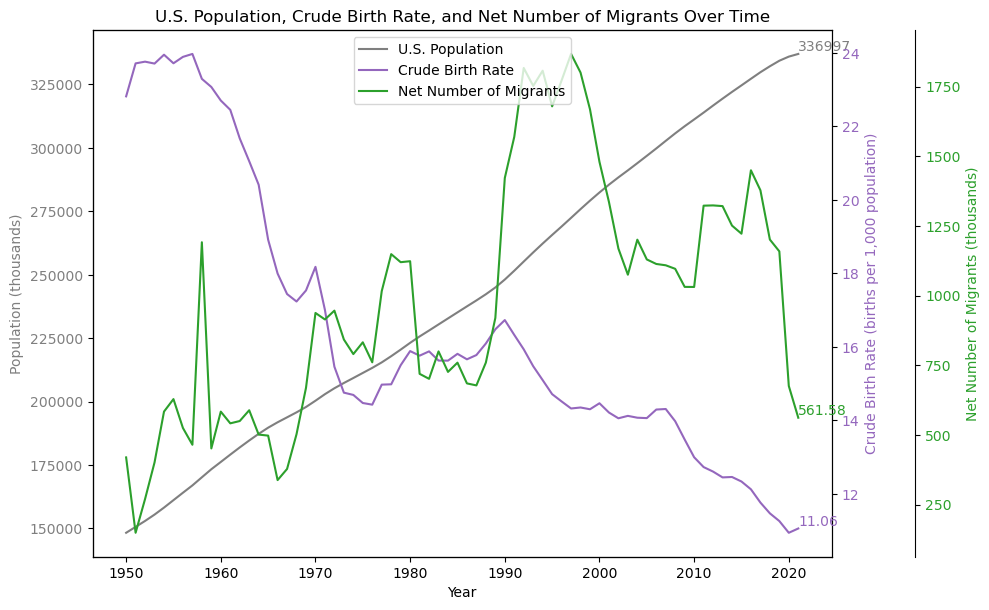

In [10]:
# Create figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population
pop_color = 'tab:gray'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)', color=pop_color)
ax1.plot(us_br_im_pop['Year'], us_br_im_pop['Total Population (thousands)'], color=pop_color, label='U.S. Population')
ax1.tick_params(axis='y', labelcolor=pop_color)

# Add text label for last point
last_year = us_br_im_pop['Year'].values[-1]
last_population = us_br_im_pop['Total Population (thousands)'].values[-1]
ax1.text(last_year, last_population, f'{int(last_population)}', va='bottom', color=pop_color)

# Create second y-axis for crude birth rate
birth_rate_color = 'tab:purple'
ax2 = ax1.twinx()
ax2.set_ylabel('Crude Birth Rate (births per 1,000 population)', color=birth_rate_color)
ax2.plot(us_br_im_pop['Year'], us_br_im_pop['Crude Birth Rate (births per 1,000 population)'], color=birth_rate_color, label='Crude Birth Rate')
ax2.tick_params(axis='y', labelcolor=birth_rate_color)

# Add text label for last point
last_birth_rate = us_br_im_pop['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax2.text(last_year, last_birth_rate, f'{last_birth_rate:.2f}', va='bottom', color=birth_rate_color)

# Create third y-axis for net number of migrants
mig_color = 'tab:green'
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Net Number of Migrants (thousands)', color=mig_color)
ax3.plot(us_br_im_pop['Year'], us_br_im_pop['Net Number of Migrants (thousands)'], color=mig_color, label='Net Number of Migrants')
ax3.tick_params(axis='y', labelcolor=mig_color)

# Add text label for last point
last_migration = us_br_im_pop['Net Number of Migrants (thousands)'].values[-1]
ax3.text(last_year, last_migration, f'{last_migration:.2f}', va='bottom', color=mig_color)

# Fix layout and display legend
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,1), bbox_transform=ax1.transAxes)

plt.title('U.S. Population, Crude Birth Rate, and Net Number of Migrants Over Time')
plt.show()


* We cannot talk about America or its population without talking about immigration. In the 1990s, it seemed everyone wanted to live in America

### <span style="color:#708090"> Post-1970 U.S. Population, Birth Rate, and Migration Comparsion </span>

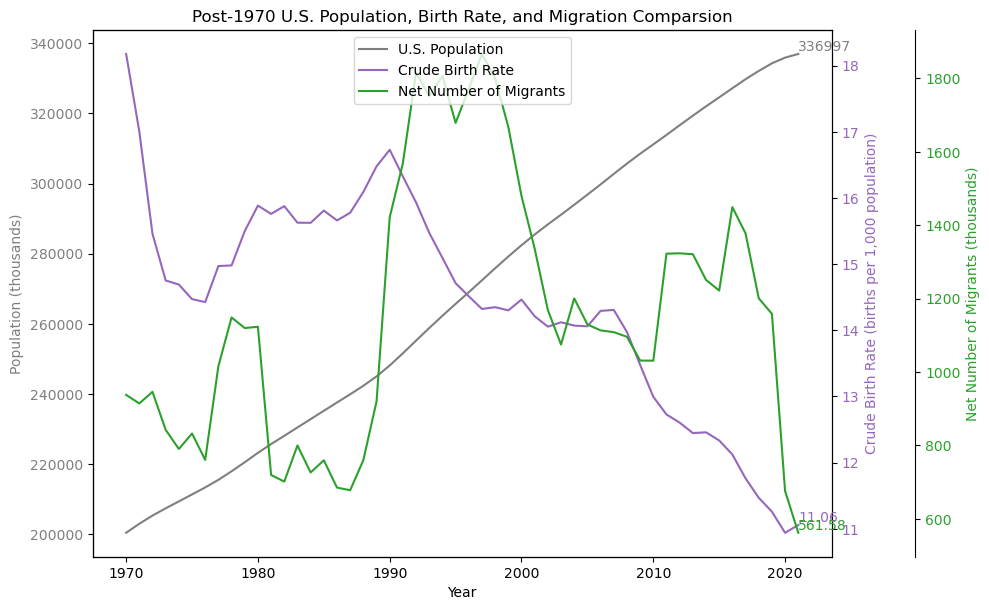

In [11]:
# Filter data
us_br_im_pop_1970 = us_br_im_pop[us_br_im_pop['Year'] >= Timestamp('1970-01-01')]

# Create figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population data
pop_color = 'tab:gray'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (thousands)', color=pop_color)
ax1.plot(us_br_im_pop_1970['Year'], us_br_im_pop_1970['Total Population (thousands)'], color=pop_color, label='U.S. Population')
ax1.tick_params(axis='y', labelcolor=pop_color)

# Add text label for last data point
last_year = us_br_im_pop_1970['Year'].values[-1]
last_population = us_br_im_pop_1970['Total Population (thousands)'].values[-1]
ax1.text(last_year, last_population, f'{int(last_population)}', va='bottom', color=pop_color)

# Create second y-axis for crude birth rate data
birth_rate_color = 'tab:purple'
ax2 = ax1.twinx()
ax2.set_ylabel('Crude Birth Rate (births per 1,000 population)', color=birth_rate_color)
ax2.plot(us_br_im_pop_1970['Year'], us_br_im_pop_1970['Crude Birth Rate (births per 1,000 population)'], color=birth_rate_color, label='Crude Birth Rate')
ax2.tick_params(axis='y', labelcolor=birth_rate_color)

# Add text label for last data point
last_birth_rate = us_br_im_pop_1970['Crude Birth Rate (births per 1,000 population)'].values[-1]
ax2.text(last_year, last_birth_rate, f'{last_birth_rate:.2f}', va='bottom', color=birth_rate_color)

# Create third y-axis for net number of migrants data
mig_color = 'tab:green'
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Net Number of Migrants (thousands)', color=mig_color)
ax3.plot(us_br_im_pop_1970['Year'], us_br_im_pop_1970['Net Number of Migrants (thousands)'], color=mig_color, label='Net Number of Migrants')
ax3.tick_params(axis='y', labelcolor=mig_color)

# Add text label for last data point
last_migration = us_br_im_pop_1970['Net Number of Migrants (thousands)'].values[-1]
ax3.text(last_year, last_migration, f'{last_migration:.2f}', va='bottom', color=mig_color)

# Fix layout and display legend
fig.tight_layout()
fig.legend(loc="upper center", bbox_to_anchor=(0.5,1), bbox_transform=ax1.transAxes)

plt.title('Post-1970 U.S. Population, Birth Rate, and Migration Comparsion')
plt.show()

* As we zoom in and quiet some of the noise again, We saw a crash in immigration in the year 2000, then a crash again in the year 2016. Immigration rates are the lowest they've been in the last 50 years

### <span style="color:#4169E1">We've officially identified a trend here. America's population is slowing as birth rates and immigration are low. However, we haven't answered if wages are affecting birth rates</span>

### <span style="color:#708090"> Average Annual Pay 2015 Top Companies With Highest CEO Pay: Worker vs CEO</span>

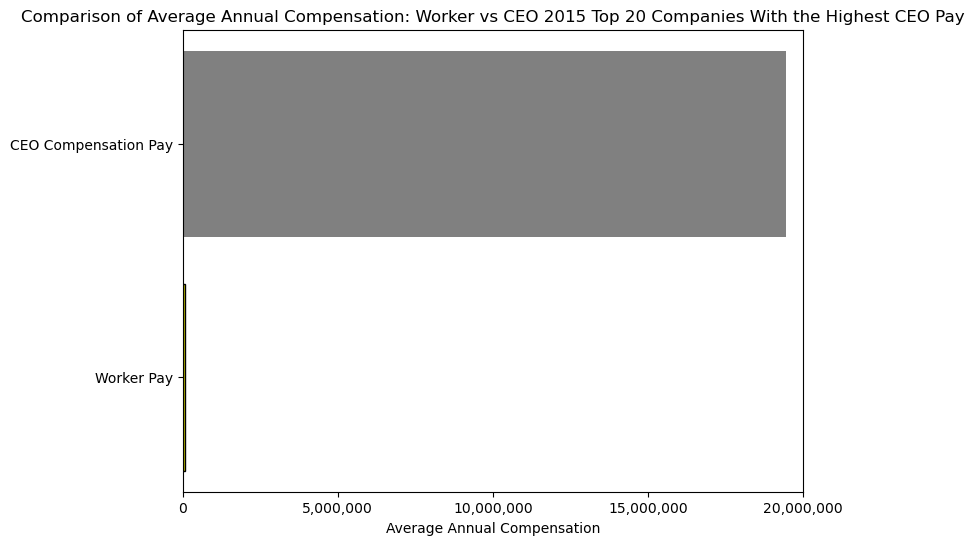

In [15]:
# Calc average
avg_worker_pay = ceo_worker_pay['Median Worker Annual Pay (cash)'].mean()
avg_ceo_compensation = ceo_worker_pay['Total CEO Compensation'].mean()

# Create bar plot
categories = ['Worker Pay', 'CEO Compensation Pay']
values = [avg_worker_pay, avg_ceo_compensation]

plt.figure(figsize=(8, 6))
bars = plt.barh(categories, values, color=['yellow', 'gray'])

# Add a border to worker
bars[0].set_edgecolor('black')
bars[0].set_linewidth(1)

plt.xlabel('Average Annual Compensation')
plt.title('Comparison of Average Annual Compensation: Worker vs CEO 2015 Top 20 Companies With the Highest CEO Pay')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set X-axis limits and tick marks
plt.xlim(0, 20000000)
plt.xticks(ticks=[0, 5000000, 10000000, 15000000, 20000000])

plt.show()

* This plot has such a drastic difference that I had to set a border around Worker Pay just so you could see it

In [13]:
# Calcu avg and round
avg_worker_pay_dollar = "${:,.2f}".format(avg_worker_pay)
avg_ceo_compensation_dollar = "${:,.2f}".format(avg_ceo_compensation)

avg_worker_pay_dollar, avg_ceo_compensation_dollar

('$74,287.50', '$19,455,743.33')

* The Average wage among the top 20 companies that had the highest CEO pay in 2015 was: 

    * Workers: $74,287.50
    
    * CEOs: $19,455,743.33

### <span style="color:#708090"> 2015 Average Total CEO Pay for Top 20 Companies With the Highest CEO Pay</span>

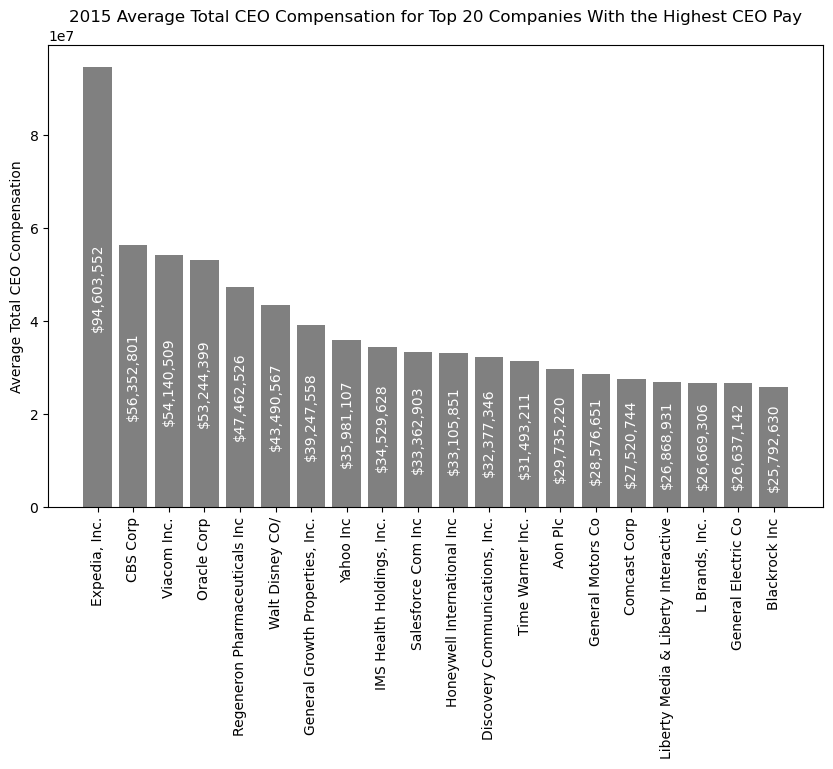

In [14]:
# Convert CEO numeric
ceo_worker_pay['Total CEO Compensation'] = pd.to_numeric(ceo_worker_pay['Total CEO Compensation'], errors='coerce')

# Group by company and calc the mean CEO
grouped_data = ceo_worker_pay.groupby('Company Name')['Total CEO Compensation'].mean()

# Sort and take top 20
top_20_companies = grouped_data.sort_values(ascending=False)[:20]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_20_companies.index.to_list(), top_20_companies, color='gray')

# Add data label
for bar in bars:
    yval = bar.get_height()
    if pd.notnull(yval): 
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'${int(yval):,}', ha='center', va='center', color='white', rotation='vertical')


plt.ylabel('Average Total CEO Compensation')
plt.title('2015 Average Total CEO Compensation for Top 20 Companies With the Highest CEO Pay')
plt.xticks(rotation=90)
plt.show()

* Here are as many as would fit in a reasonable-sized plot: CEO wage in total compensation in descending order for 2015

### <span style="color:#708090">2015 Avg CEO/Worker Pay for Top 20 With The Highest CEO Pay and Pay Differences</span>

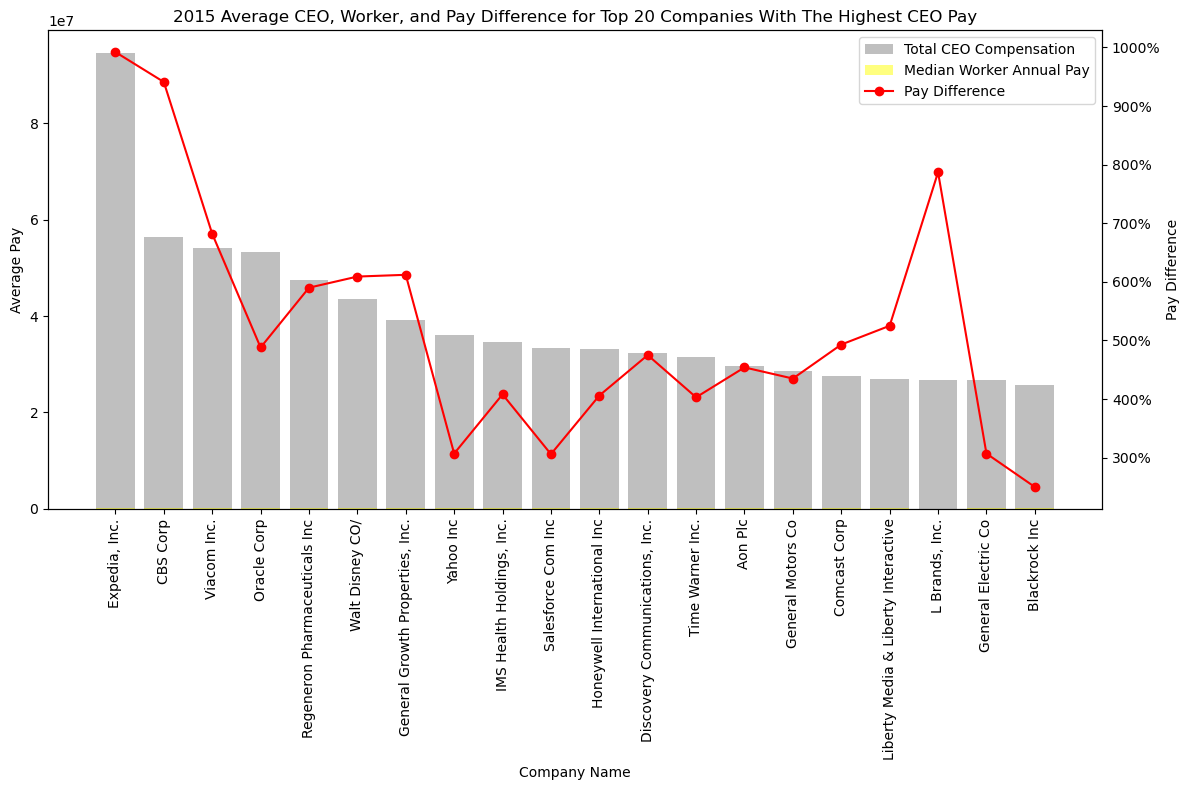

In [15]:
# Filter top 20 companies with the highest average CEO 
top_20_companies = ceo_worker_pay.groupby("Company Name").mean().nlargest(20, "Total CEO Compensation")

# Create figure and set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar for CEO
ax1.bar(top_20_companies.index, top_20_companies["Total CEO Compensation"], label="Total CEO Compensation", color='gray', alpha=0.5)

# Bar for worker
ax1.bar(top_20_companies.index, top_20_companies["Median Worker Annual Pay (cash)"], label="Median Worker Annual Pay", color='yellow', alpha=0.5)

# Create second y-axis for pay difference
ax2 = ax1.twinx()
ax2.plot(top_20_companies.index, top_20_companies["Pay Difference (cash)"], label="Pay Difference", color='red', marker='o')

# Function to format y-axis label
def format_func(value, tick_number):
    return f'{int(value*100)}%'

# Set formatter for y-axis label
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))

# Formatting
ax1.set_xticklabels(top_20_companies.index, rotation=90)
ax1.set_xlabel("Company Name")
ax1.set_ylabel("Average Pay")
ax2.set_ylabel("Pay Difference")
plt.title("2015 Average CEO, Worker, and Pay Difference for Top 20 Companies With The Highest CEO Pay")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

* And here is the pay difference of those exact companies between workers and CEOs. Notice the workers are on this plot too. This is a stacked bar chart, after all. The issue is that you can only see a small flare of yellow at the bottom

### <span style="color:#708090">2015 Average CEO Compensation and Worker Pay for Top 20 Companies</span>

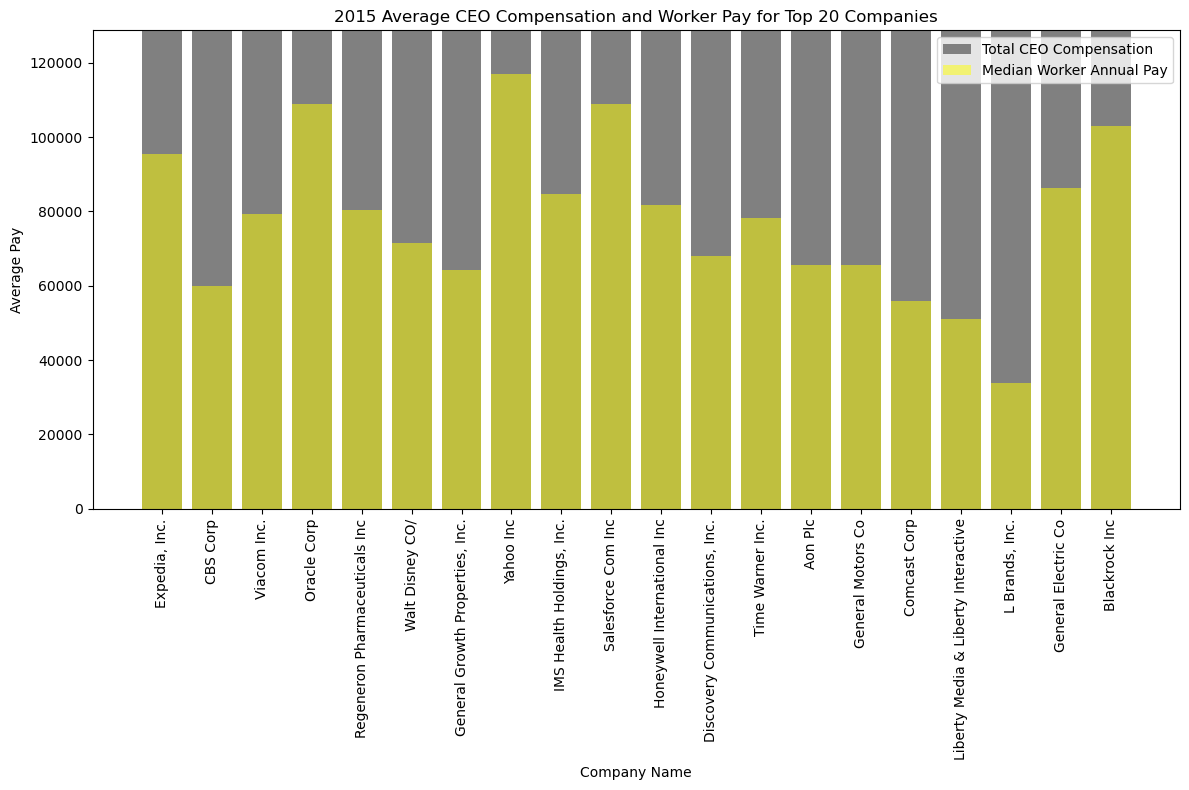

In [16]:
# Filter top 20 companies with the highest average CEO
top_20_companies = ceo_worker_pay.groupby("Company Name").mean().nlargest(20, "Total CEO Compensation")

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar for CEO
ax.bar(top_20_companies.index, top_20_companies["Total CEO Compensation"], label="Total CEO Compensation", color='gray')

# Bar for worker
ax.bar(top_20_companies.index, top_20_companies["Median Worker Annual Pay (cash)"], label="Median Worker Annual Pay", color='yellow', alpha=0.5)

# Set limit to highlight worker
ax.set_ylim([0, top_20_companies["Median Worker Annual Pay (cash)"].max() * 1.1]) # Here 1.1 is used to leave some space above the highest bar

plt.xticks(rotation=90)
plt.xlabel("Company Name")
plt.ylabel("Average Pay")
plt.title("2015 Average CEO Compensation and Worker Pay for Top 20 Companies")
plt.legend()
plt.tight_layout()
plt.show()

* Here are those same companies zoomed in, so the workers annual pay is actually visible now

### <span style="color:#708090"> Average Annual Pay 2021 Most Popular Companies: Worker vs CEO</span>

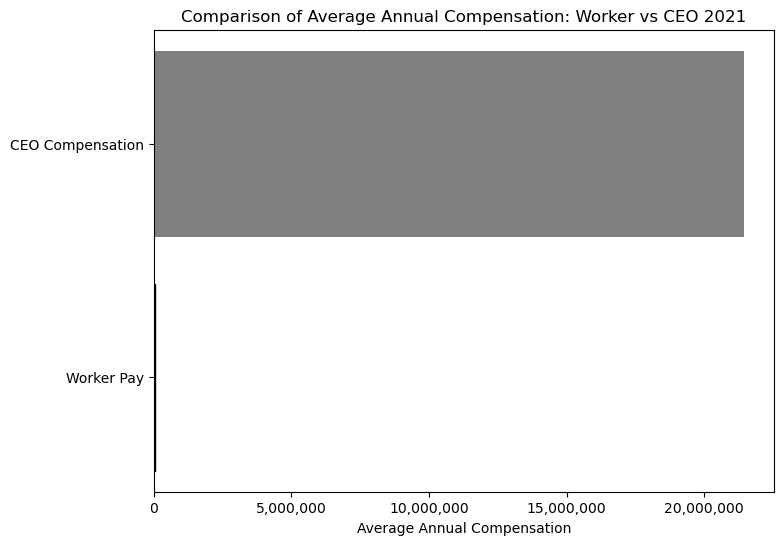

In [17]:
# Calc the avg
avg_worker_pay_2021 = ceo_worker_pay_2021['Average Employee Salary'].mean()
avg_ceo_compensation_2021 = ceo_worker_pay_2021['CEO Salary'].mean()

# Create bar plot
categories = ['Worker Pay', 'CEO Compensation']
values = [avg_worker_pay_2021, avg_ceo_compensation_2021]

plt.figure(figsize=(8, 6))
bars = plt.barh(categories, values, color=['yellow', 'gray'])

# Add border to worker
bars[0].set_edgecolor('black')

plt.xlabel('Average Annual Compensation')
plt.title('Comparison of Average Annual Compensation: Worker vs CEO 2021')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

* Now let's check out the latest publicly available data on this topic in 2021. The worker's pay actually went down, while the CEO's pay went up

* Full disclosure: this is NOT a 1:1 comparison to the 2015 data, as some of the companies have been replaced. I would love to get my hands on some more data. However, it is all paywalled, to the best of my knowledge

In [18]:
# Calc avg and round
avg_worker_pay = ceo_worker_pay_2021['Average Employee Salary'].mean()
avg_ceo_compensation = ceo_worker_pay_2021['CEO Salary'].mean()

avg_worker_pay_dollar = "${:,.2f}".format(avg_worker_pay)
avg_ceo_compensation_dollar = "${:,.2f}".format(avg_ceo_compensation)

avg_worker_pay_dollar, avg_ceo_compensation_dollar


('$51,394.16', '$21,452,873.60')

* The Average wage among the most popular companies in 2021 was: 

    * Workers: $51,394.16
    
    
    * CEOs: $21,452,873.60

### <span style="color:#708090"> 2021 Average CEO Salary for Popular Companies</span>

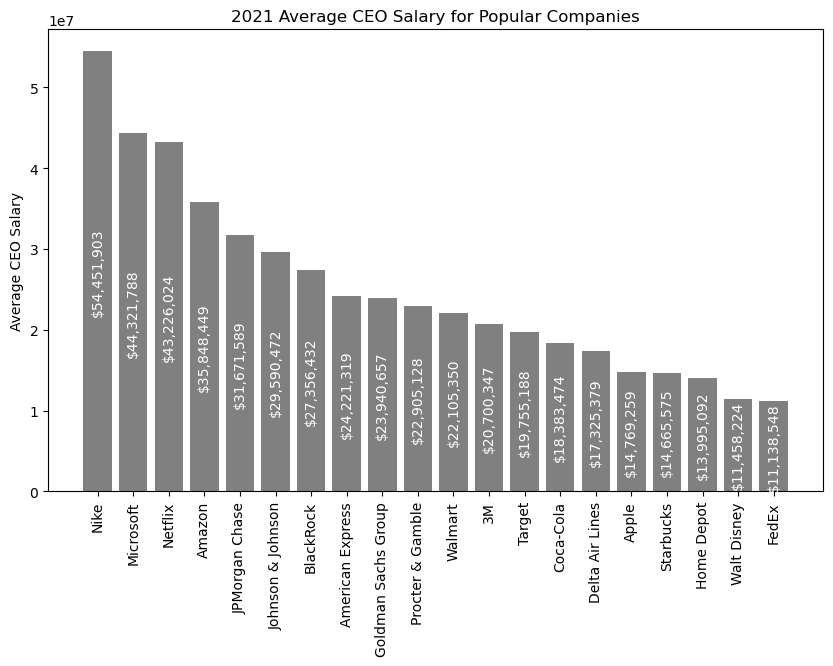

In [19]:
# Convert CEO numeric
ceo_worker_pay_2021['CEO Salary'] = pd.to_numeric(ceo_worker_pay_2021['CEO Salary'], errors='coerce')

# Group by company calc mean CEO
grouped_data_2021 = ceo_worker_pay_2021.groupby('Company')['CEO Salary'].mean()

# Sort and take top 20
top_20_companies_2021 = grouped_data_2021.sort_values(ascending=False)[:20]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_20_companies_2021.index.to_list(), top_20_companies_2021, color='gray')

# Add data label
for bar in bars:
    yval = bar.get_height()
    if pd.notnull(yval):  # Only add label if yval is not NaN
        plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'${int(yval):,}', ha='center', va='center', color='white', rotation='vertical')

plt.ylabel('Average CEO Salary')
plt.title('2021 Average CEO Salary for Popular Companies')
plt.xticks(rotation=90)
plt.show()

* The 2021 variation of the highest wages for popular companies in descending order

### <span style="color:#708090"> 2021 Avg CEO and Worker Salary, and Hours of Work To Equal 1 Minute of CEO Pay For Popular Companies</span>

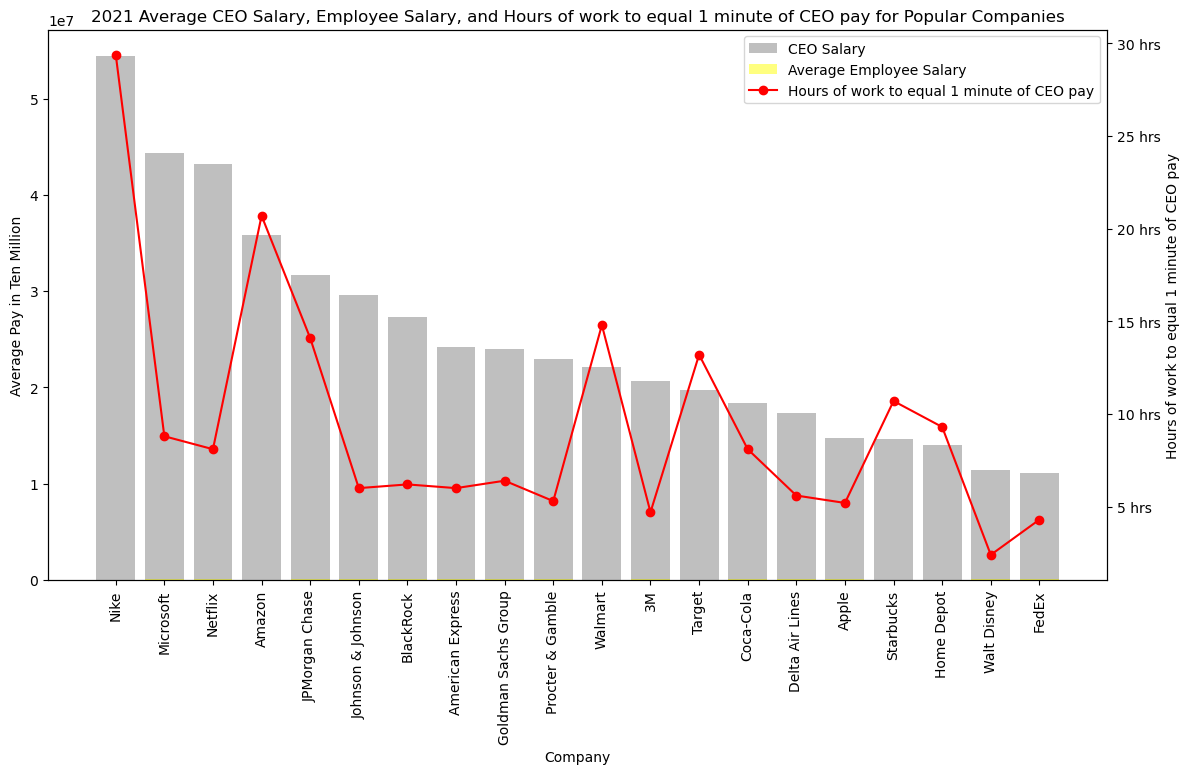

In [20]:
# Filter top 20 companies with the highest average CEO Compensation
top_20_companies = ceo_worker_pay_2021.groupby("Company").mean().nlargest(20, "CEO Salary")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar for CEO Compensation
ax1.bar(top_20_companies.index, top_20_companies["CEO Salary"], label="CEO Salary", color='gray', alpha=0.5)

# Bar for Worker Pay
ax1.bar(top_20_companies.index, top_20_companies["Average Employee Salary"], label="Average Employee Salary", color='yellow', alpha=0.5)

# Create a second y-axis for the 'Hours of work to equal 1 minute of CEO pay' data
ax2 = ax1.twinx()
ax2.plot(top_20_companies.index, top_20_companies["Hours of work to equal 1 minute of CEO pay"], label="Hours of work to equal 1 minute of CEO pay", color='red', marker='o')

# Function to format y-axis labels
def format_func(value, tick_number):
    return f'{int(value)} hrs'

# Set formatter for y-axis labels
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))

# Formatting
ax1.set_xticklabels(top_20_companies.index, rotation=90)
ax1.set_xlabel("Company")
ax1.set_ylabel("Average Pay in Ten Million")
ax2.set_ylabel("Hours of work to equal 1 minute of CEO pay")
plt.title("2021 Average CEO Salary, Employee Salary, and Hours of work to equal 1 minute of CEO pay for Popular Companies")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

* Here we have the workers again represented with their CEOs, and again, you can't see them reasonably. Additionally, we have a dual-axis chart conveying how many hours it would take for the workers to make 1 minute of the CEO's pay

### <span style="color:#708090">2021 Average CEO and Worker Salary for Popular Companies</span>

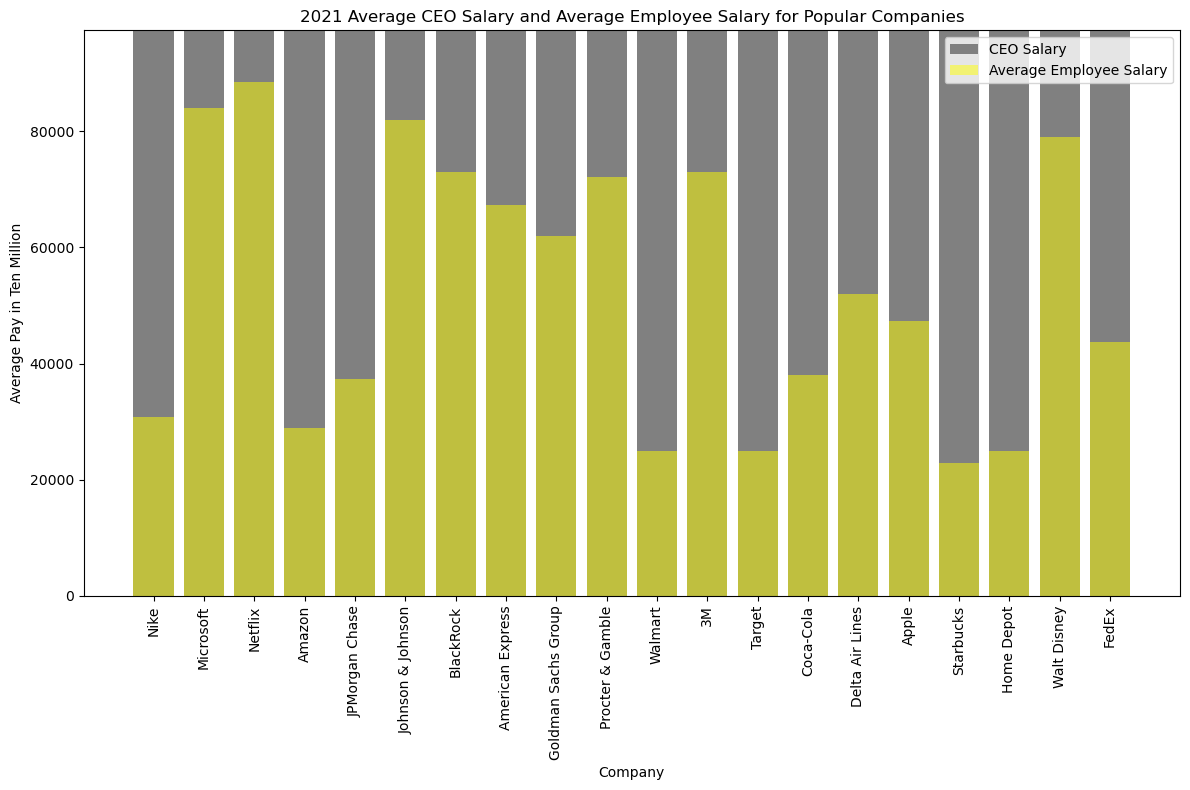

In [21]:
# Filter top 20 companies with highest average CEO 
top_20_companies = ceo_worker_pay_2021.groupby("Company").mean().nlargest(20, "CEO Salary")

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar for CEO 
ax.bar(top_20_companies.index, top_20_companies["CEO Salary"], label="CEO Salary", color='gray')

# Bar for worker
ax.bar(top_20_companies.index, top_20_companies["Average Employee Salary"], label="Average Employee Salary", color='yellow', alpha=0.5)

# Set limit to highlight worker
ax.set_ylim([0, top_20_companies["Average Employee Salary"].max() * 1.1]) # Here 1.1 is used to leave some space above the highest bar

plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("Average Pay in Ten Million")
plt.title("2021 Average CEO Salary and Average Employee Salary for Popular Companies")
plt.legend()
plt.tight_layout()
plt.show()


* Once again, we have to zoom in to see the workers average wages

## <span style="color:#4169E1">Bringing it all together</span>

### <span style="color:#708090">Change in Earnings From 1979 to 2018 by Different Bracket Types</span>

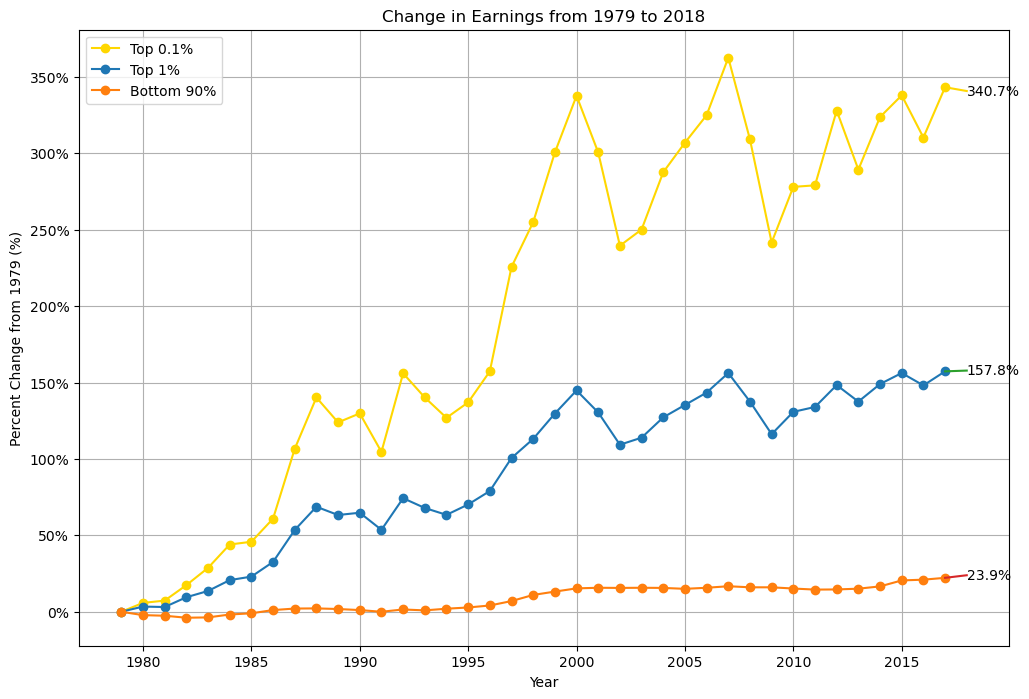

In [22]:
# Plot data
plt.figure(figsize=(12, 8))
plt.plot(earnings_data["Year"][:-1], earnings_data["Top 0.1%"][:-1]*100, label="Top 0.1%", marker='o', color="gold", linestyle='-')
plt.plot(earnings_data["Year"][:-1], earnings_data["Top 1%"][:-1]*100, label="Top 1%", marker='o', linestyle='-')
plt.plot(earnings_data["Year"][:-1], earnings_data["Bottom 90%"][:-1]*100, label="Bottom 90%", marker='o', linestyle='-')

# syntax to not create a marker on last point
plt.plot(earnings_data["Year"][-2:], earnings_data["Top 0.1%"][-2:]*100, label=None, marker='', color="gold", linestyle='-')
plt.plot(earnings_data["Year"][-2:], earnings_data["Top 1%"][-2:]*100, label=None, marker='', linestyle='-')
plt.plot(earnings_data["Year"][-2:], earnings_data["Bottom 90%"][-2:]*100, label=None, marker='', linestyle='-')

# Add final values to each line
ax = plt.gca() 
ax.text(2018, earnings_data["Top 0.1%"].iloc[-1]*100, f"{earnings_data['Top 0.1%'].iloc[-1]*100:.1f}%", va='center', ha='left', color="black")
ax.text(2018, earnings_data["Top 1%"].iloc[-1]*100, f"{earnings_data['Top 1%'].iloc[-1]*100:.1f}%", va='center', ha='left', color="black")
ax.text(2018, earnings_data["Bottom 90%"].iloc[-1]*100, f"{earnings_data['Bottom 90%'].iloc[-1]*100:.1f}%", va='center', ha='left', color="black")

# Format y-axis as %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.xlabel("Year")
plt.ylabel("Percent Change from 1979 (%)")
plt.title("Change in Earnings from 1979 to 2018")
plt.legend()
plt.grid(True)
plt.show()


 * This is the wage growth for different earning brackets. The top 0.1% is roughly 33,000 Americans as of 2018, which is when the plot ends, gained 340.7% of that wage growth since 1979. They got that increase from the workers and their increased level of productivity. See the first plot if you need a reminder

* The top 1%, roughly 33 million Americans as of 2018, gained 157.8% again off the backs of workers labor

* Finally, we have the Bottom 90%, which is roughly 298 million Americans as of 2018. They have gained just 23.9% of the earnings as of 2018

### <span style="color:#708090">Distribution of Earnings Changes from 1979 to 2018 by Different Bracket Types</span>

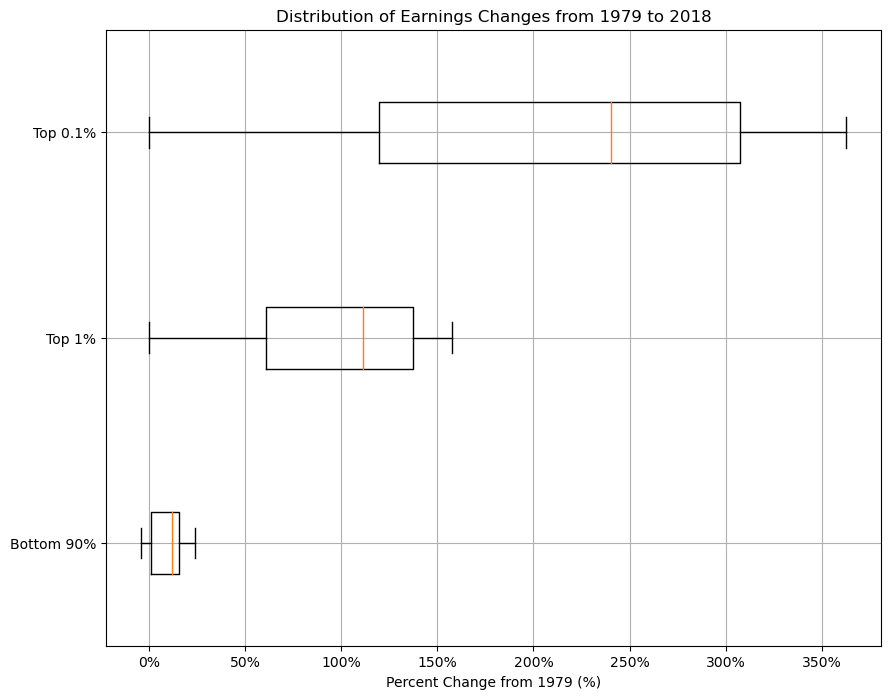

In [23]:
# Prepare
earnings_data_box = earnings_data[["Bottom 90%", "Top 1%", "Top 0.1%"]]

# Create box plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot([earnings_data_box["Bottom 90%"], earnings_data_box["Top 1%"], earnings_data_box["Top 0.1%"]], vert=False, labels=["Bottom 90%", "Top 1%", "Top 0.1%"])

# Set x-axis to show %
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# Set label
ax.set_xlabel("Percent Change from 1979 (%)")
ax.set_title("Distribution of Earnings Changes from 1979 to 2018")

# Show grid
ax.grid(True)

plt.show()

* Same info as the previous plot, just a different format

## <span style="color:#708090"> Act - Step 6: Conclusion and Next Steps </span>

## <span style="color:#708090"> Conclusion </span>

After analyzing all the data, I have found some insights that can help bring more knowledge to readers. That being said, I lack enough data to definitely prove the reasoning for the drop in birth rates. Life is complicated, and humans are complex. If you learned something, though, then my mission was a success.

* Productivity kept up with workers wages until 1970. As time passed, the difference grew exponentially

* Birth rates have been on the decline since the baby boom. Yet there is some correlation between worker wages and a continued drop in birth rates, as there was a pause in birth rate declines in the 1990s

* As labor productivity grew further away from workers wages, the birth rate started dropping again.

* The United States population is plateauing

* Immigration into the U.S. has slowed to levels of the 1970s

* CEO's total compensation to workers wages on average for the sheets used is a ratio of 339.5:1. 

* The top 0.1% received 340.7%, the top 1% received 157.8%, and the bottom 90% received 23.9% of the total earning change from 1979 to 2018.


The data I would like includes, but is not limited to:

* All CEO pay dates back from 1947 to modern times

* Company earnings from 1947 to modern times

* The amount spent on stock buybacks from November 1982 to modern times




## <span style="color:#708090"> Next Steps </span>

### <span style="color:#708090"> My Recommendations: </span>

Based on the data I presented, the pay disparity between CEOs and workers is striking, with an average ratio of 339.5:1. Such a significant difference is concerning and warrants attention. Companies listed on the NASDAQ and NYSE may prioritize satisfying their board members or prioritizing short-term gains, which can lead to such discrepancies in compensation. Which has a generalized correlation to the United States birth rates.

To address this issue, I propose a shift in the incentive structure for CEO compensation. Currently, a substantial portion of their income comes from bonuses, which may encourage them to focus solely on maximizing profits, often at the expense of workers. I advocate for a revised system that promotes worker growth and well-being and values a CEO's ability to lead, inspire, and garner positive recognition from employees and the public. By aligning CEO incentives with the overall success of the company and fostering a positive work environment, businesses can thrive and achieve sustainable growth.

However, I also believe that the responsibility for change lies not solely with the CEOs and corporations but also with us, the employees. We must set boundaries and establish certain requirements that employers must meet in terms of fair compensation, employee welfare, and ethical practices.

Bringing about substantial change requires collective action and solidarity among the workforce. It's time for us, the people, to unite for a more equitable and sustainable future for the workplace.

### <span style="color:#708090"> Last Thoughts: </span>

There are great CEOs in the world of all varying sized companies that share the profits with their workers and understand that we are all connected and that we all need each other to survive. That no one can do much of anything on their own and reward their employees accordingly.

Ultimately, I desire to promote unity, as we (society) are only as strong as our weakest link. Thank you for reading my third case study.